In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-83.24911866443595 138.63251590864746
54.29786702479282 152.36061420999135
-84.59834941701803 -59.123683211514034
82.13272170666741 70.34483086441972
-70.36061245777353 49.65044853108108
69.45611497984538 0.24387851140213002
-67.60827344520172 166.45673978168492
7.139541187483928 143.5438846053545
-21.750631154218638 169.93639708425775
-81.2335436014599 167.79688035281941
50.54020560771363 -152.87527998402544
-43.98802562782853 144.86930300401013
-42.95668995045857 170.37630667434854
-1.9205402967808425 41.80123728566991
-63.07762059915994 92.89455645661366
-57.46722945857378 -101.01486009464452
82.51759323808702 -134.57120814829906
74.40344499808523 91.98952498836161
-5.7652740819205945 -75.29393030038865
83.49088658269744 -128.66094480410163
-71.17525619086337 34.029111365412604
-29.76088438717681 102.66827835806009
71.30863372636597 137.9185061332932
63.17856130702185 -163.20377200774976
46.46807323493701 172.57585007433647
17.505544601336922 142.73718850575028
76.35830022745961 98.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

571

In [7]:
import requests
requests.__version__


'2.28.1'

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=380b949baadc69dacad99fa497f42584


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | sobolevo
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | raudeberg
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | tadine
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | hokitika
Processing Record 13 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | lagunas
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 22 of 

Processing Record 37 of Set 4 | chapais
Processing Record 38 of Set 4 | maarianhamina
Processing Record 39 of Set 4 | hamilton
Processing Record 40 of Set 4 | emerald
Processing Record 41 of Set 4 | saleaula
City not found. Skipping...
Processing Record 42 of Set 4 | kropotkin
Processing Record 43 of Set 4 | anadyr
Processing Record 44 of Set 4 | carballo
Processing Record 45 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 4 | half moon bay
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | dakar
Processing Record 49 of Set 4 | tatawin
Processing Record 50 of Set 4 | karratha
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | flinders
Processing Record 3 of Set 5 | rungata
City not found. Skipping...
Processing Record 4 of Set 5 | elat
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | saint-louis
Processing Record 7 of Set 5 | port blair
Processi

Processing Record 25 of Set 8 | pacific grove
Processing Record 26 of Set 8 | denpasar
Processing Record 27 of Set 8 | crab hill
City not found. Skipping...
Processing Record 28 of Set 8 | toktogul
Processing Record 29 of Set 8 | tecoanapa
Processing Record 30 of Set 8 | barraute
Processing Record 31 of Set 8 | egvekinot
Processing Record 32 of Set 8 | lerik
Processing Record 33 of Set 8 | bambanglipuro
Processing Record 34 of Set 8 | mortka
Processing Record 35 of Set 8 | mankera
Processing Record 36 of Set 8 | aykhal
Processing Record 37 of Set 8 | naze
Processing Record 38 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 39 of Set 8 | ambatondrazaka
Processing Record 40 of Set 8 | la rioja
Processing Record 41 of Set 8 | saint-pierre
Processing Record 42 of Set 8 | bejar
Processing Record 43 of Set 8 | tateyama
Processing Record 44 of Set 8 | ulaangom
Processing Record 45 of Set 8 | kawalu
Processing Record 46 of Set 8 | kondinskoye
Processing Record 47 of Set 8 |

Processing Record 15 of Set 12 | taoudenni
Processing Record 16 of Set 12 | albufeira
Processing Record 17 of Set 12 | zakamensk
Processing Record 18 of Set 12 | maldonado
Processing Record 19 of Set 12 | bubaque
Processing Record 20 of Set 12 | rudbar
Processing Record 21 of Set 12 | korla
-----------------------------
Data Retrieval Complete      
-----------------------------


In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,58.26,63,20,13.80,AU,2022-10-13 23:01:53
1,Sobolevo,54.4299,31.8996,38.48,84,10,3.04,RU,2022-10-13 23:03:09
2,Ushuaia,-54.8000,-68.3000,35.20,93,87,4.36,AR,2022-10-13 23:01:51
3,Dikson,73.5069,80.5464,32.56,99,100,25.10,RU,2022-10-13 23:03:09
4,East London,-33.0153,27.9116,69.78,80,77,18.43,ZA,2022-10-13 23:02:02
5,Raudeberg,61.9875,5.1352,47.86,68,81,16.22,NO,2022-10-13 23:03:10
6,Bluff,-46.6000,168.3333,52.81,66,4,3.67,NZ,2022-10-13 23:03:11
7,Airai,-8.9266,125.4092,65.55,72,58,1.59,TL,2022-10-13 23:01:25
8,Tadine,-21.5500,167.8833,72.45,64,100,10.16,NC,2022-10-13 23:03:11
9,Kodiak,57.7900,-152.4072,42.94,49,53,3.06,US,2022-10-13 23:02:38


In [24]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-10-13 23:01:53,-42.8794,147.3294,58.26,63,20,13.80
1,Sobolevo,RU,2022-10-13 23:03:09,54.4299,31.8996,38.48,84,10,3.04
2,Ushuaia,AR,2022-10-13 23:01:51,-54.8000,-68.3000,35.20,93,87,4.36
3,Dikson,RU,2022-10-13 23:03:09,73.5069,80.5464,32.56,99,100,25.10
4,East London,ZA,2022-10-13 23:02:02,-33.0153,27.9116,69.78,80,77,18.43


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

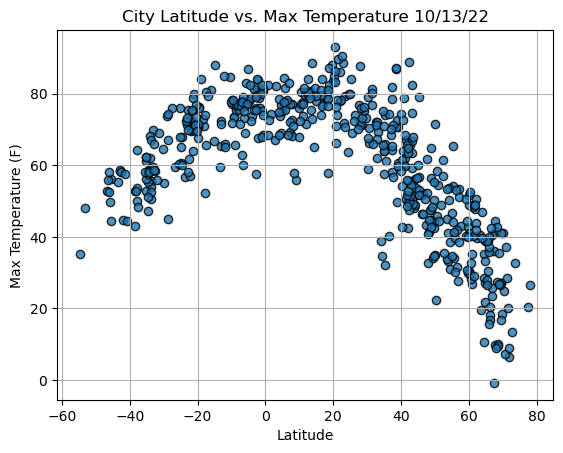

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

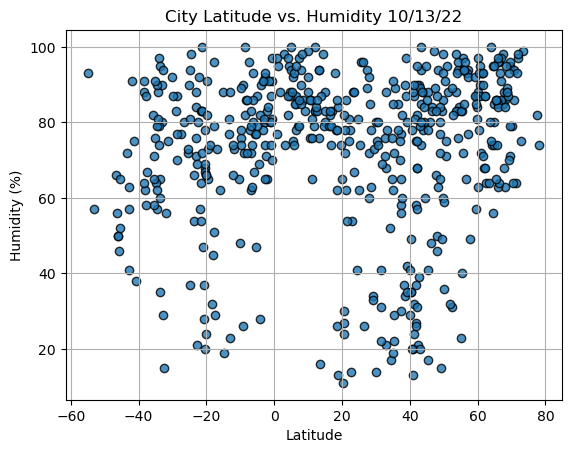

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

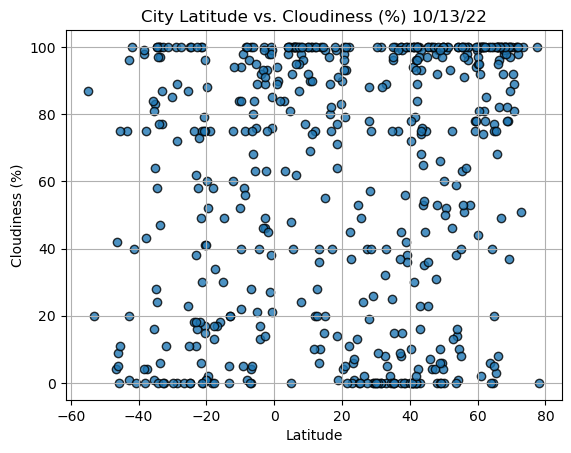

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

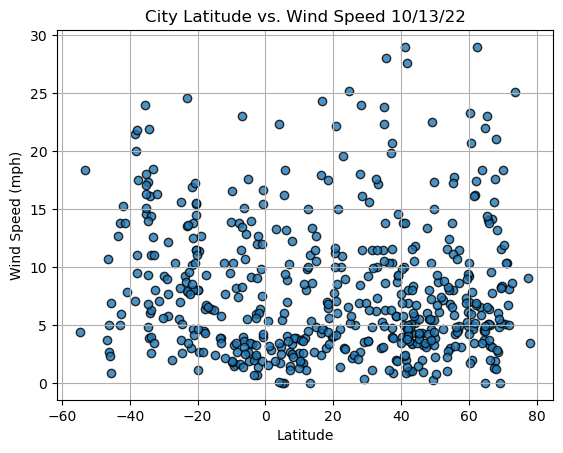

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [17]:
index13 = city_data_df.loc[13]

In [18]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key